# Predicting patients with potential heart failure using supervised machine learning modeling with various algorithms.

# Data Preperation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
#Libraries for visualization and reading the data

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [4]:
data.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Sex', ylabel='count'>

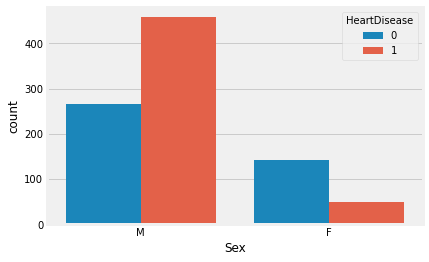

In [7]:
sns.countplot(x='Sex',hue='HeartDisease', data = data)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

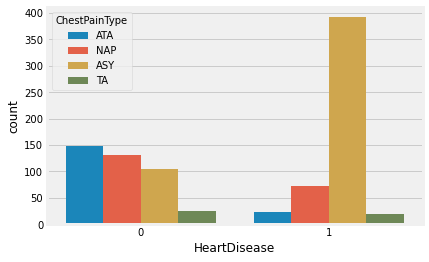

In [8]:
sns.countplot(x='HeartDisease',hue='ChestPainType', data = data)

<AxesSubplot:xlabel='FastingBS', ylabel='count'>

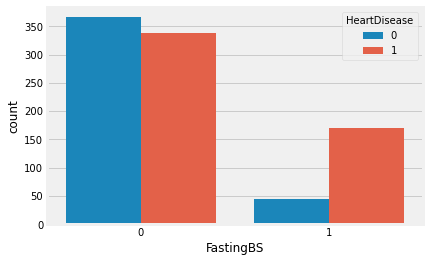

In [9]:
sns.countplot(x='FastingBS',hue='HeartDisease', data = data)

<AxesSubplot:xlabel='RestingECG', ylabel='count'>

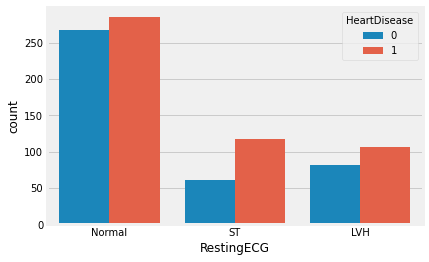

In [10]:
sns.countplot(x='RestingECG',hue='HeartDisease', data = data)

<AxesSubplot:xlabel='ExerciseAngina', ylabel='count'>

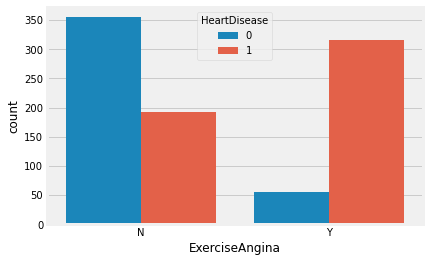

In [11]:
sns.countplot(x='ExerciseAngina',hue='HeartDisease', data = data)

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

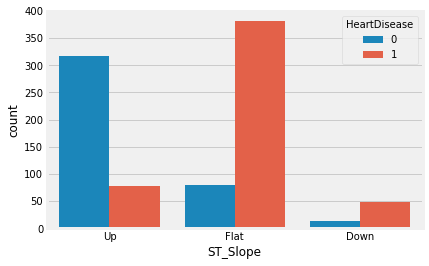

In [12]:
sns.countplot(x='ST_Slope',hue='HeartDisease', data = data)

# Outlier removal

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

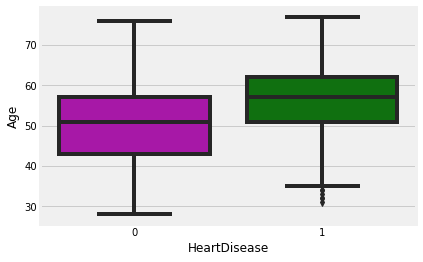

In [13]:
sns.boxplot(x='HeartDisease', y='Age',palette=["m", "g"], data = data)

<AxesSubplot:xlabel='HeartDisease', ylabel='RestingBP'>

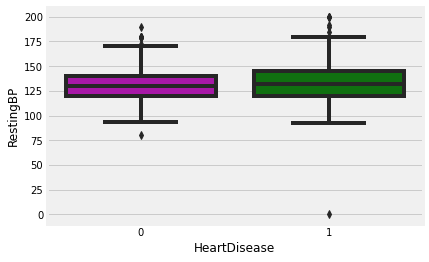

In [14]:
sns.boxplot(x='HeartDisease', y='RestingBP',palette=["m", "g"], data = data)

In [15]:
Q1 = np.percentile(data['RestingBP'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['RestingBP'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)
upper = np.where(data['RestingBP'] >= (Q3+1.5*IQR))
lower = np.where(data['RestingBP'] <= (Q1-1.5*IQR))

data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (918, 12)
New Shape:  (876, 12)


<AxesSubplot:xlabel='HeartDisease', ylabel='Cholesterol'>

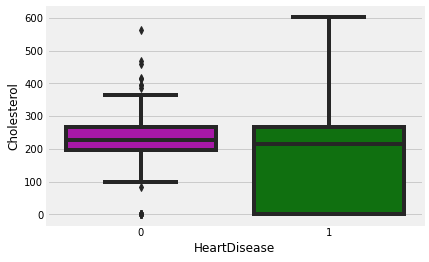

In [16]:
sns.boxplot(x='HeartDisease', y='Cholesterol',palette=["m", "g"], data = data)
#HDL and LDL cancel out each other resulting tons of 0 values

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

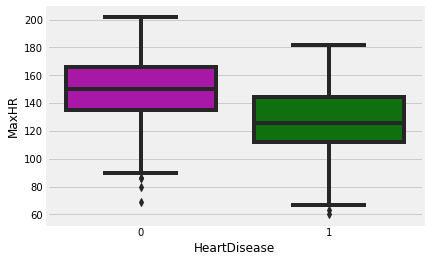

In [17]:
sns.boxplot(x='HeartDisease', y='MaxHR',palette=["m", "g"], data = data)

In [18]:
#Outlier identification and removal
Q1 = np.percentile(data['MaxHR'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['MaxHR'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", data.shape)
upper = np.where(data['MaxHR'] >= (Q3+1.5*IQR))
lower = np.where(data['MaxHR'] <= (Q1-1.5*IQR))

data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
print("New Shape: ", data.shape)

Old Shape:  (876, 12)
New Shape:  (874, 12)


In [19]:
discrette_feature = [i for i in data.columns if data[i].nunique() < 10]
continuous_feature = [i for i in data.columns if data[i].nunique() > 10]
print(f'discrette feature: {discrette_feature}')
print(f'continuous feature: {continuous_feature}')

discrette feature: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
continuous feature: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


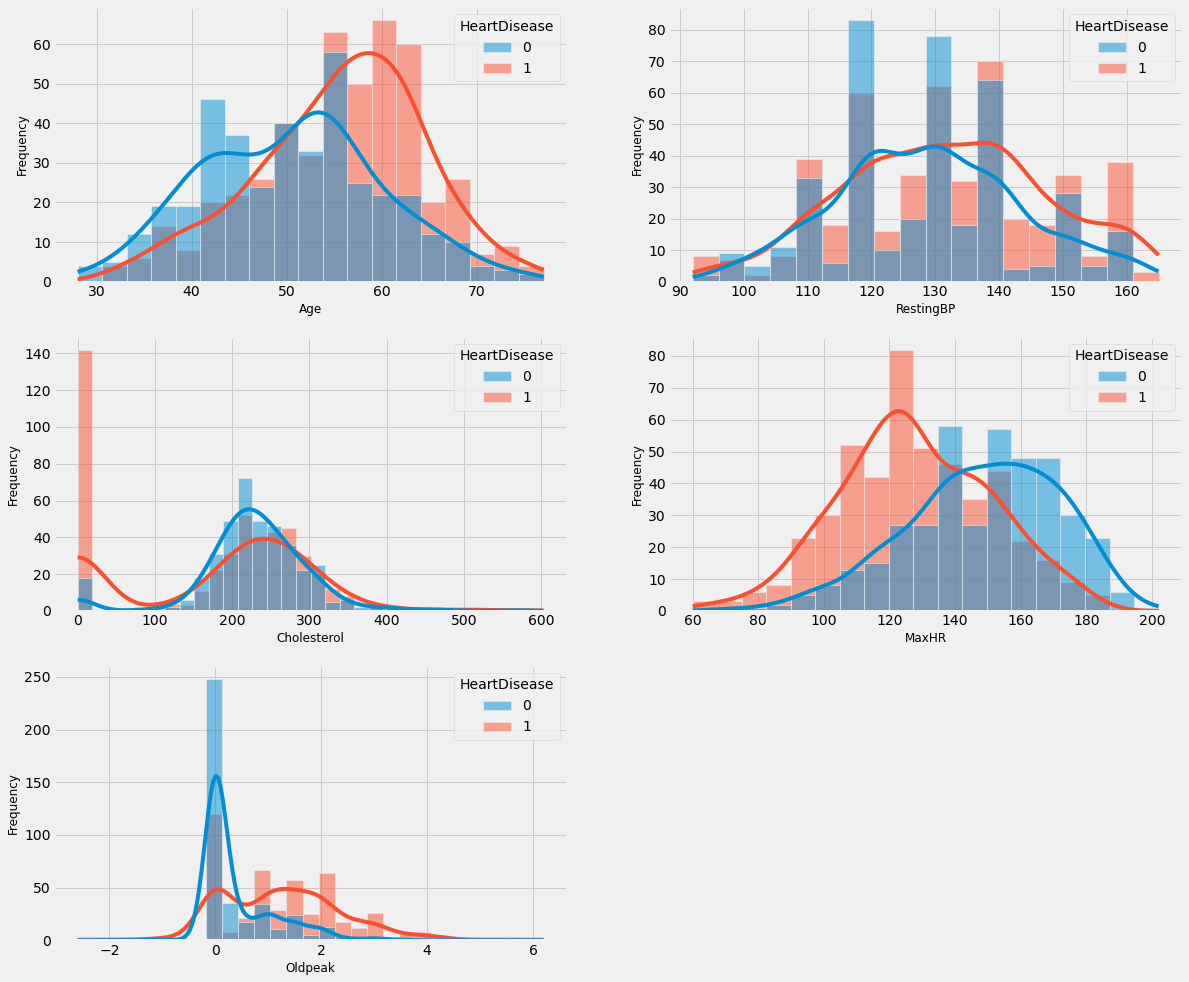

In [20]:
plt.style.use('fivethirtyeight')
i = 1
plt.figure(figsize=(18,16)) 
for feature in continuous_feature:
    plt.subplot(3, 2, i)
    sns.histplot(x=data[feature],kde=True, hue=data.HeartDisease)
    plt.xlabel(feature,size=12)
    plt.ylabel("Frequency",size=12)
    i += 1
plt.show()

D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
D:\Anaconda\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0, 0.5, 'Maximum Heart Rate (bpm)')

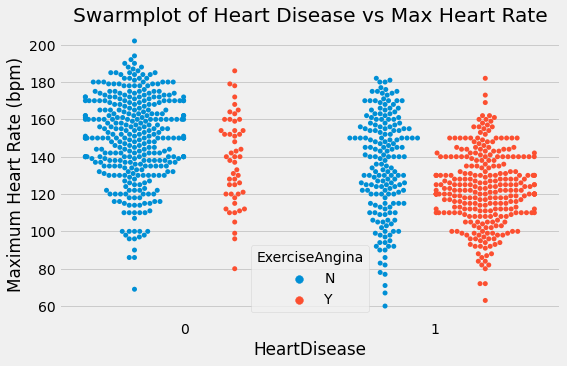

In [21]:
#Swarmplot of Heart Disease vs MaxHR
plt.figure(figsize=(8,5))
sns.swarmplot(x='HeartDisease', y='MaxHR', data=data, hue='ExerciseAngina', dodge=True)
plt.title('Swarmplot of Heart Disease vs Max Heart Rate')
plt.ylabel('Maximum Heart Rate (bpm)')

<AxesSubplot:>

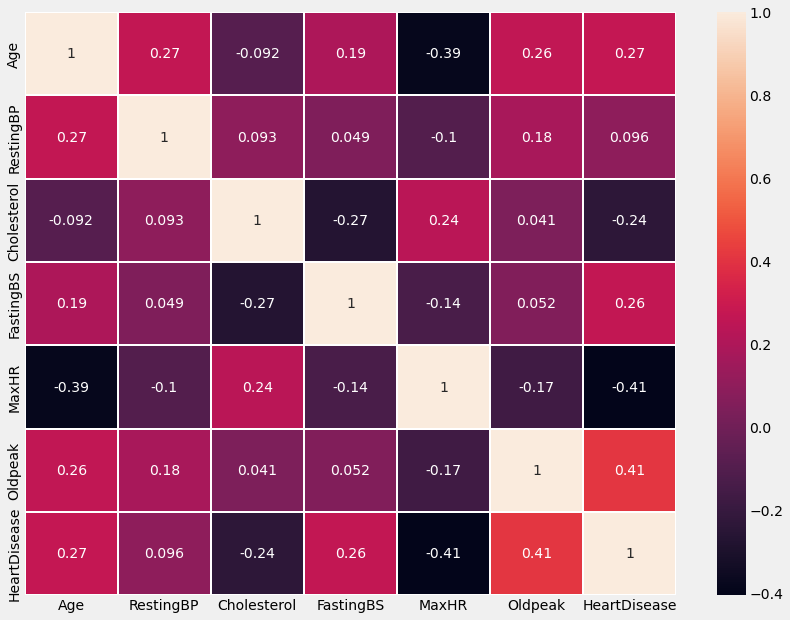

In [22]:
corr = data.corr()
plt.figure(figsize=(13,10))
sns.heatmap(corr, annot=True,linewidths=2)

In [23]:
trial_data = data
trial_data = trial_data.sample(frac = 1)

# Preprocessing, Training & Modeling

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler

In [25]:
#Turning categorical to numerical values
data_encoded = data
lbl = LabelEncoder()
data_encoded['Sex'] = lbl.fit_transform(data_encoded['Sex'])
data_encoded['ChestPainType'] = lbl.fit_transform(data_encoded['ChestPainType'])
data_encoded['RestingECG'] = lbl.fit_transform(data_encoded['RestingECG'])
data_encoded['ExerciseAngina'] = lbl.fit_transform(data_encoded['ExerciseAngina'])
data_encoded['ST_Slope'] = lbl.fit_transform(data_encoded['ST_Slope'])
data_encoded.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0

In [26]:
#Storing the min and max values for input scaling
Age_min = 28
Age_max = 77
Sex_min = 0
Sex_max = 1
ChestPainType_min = 0
ChestPainType_max = 3
RestingBP_min = 92
RestingBP_max = 165
Cholesterol_min = 0
Cholesterol_max = 603
FastingBS_min = 0
FastingBS_max = 1
RestingECG_min = 0
RestingECG_max = 2
MaxHR_min = 60
MaxHR_max = 202
ExerciseAngina_min = 0
ExerciseAngina_max = 1
Oldpeak_min = -2.6
Oldpeak_max = 6.2
ST_Slope_min = 0
ST_Slope_max = 2
data_encoded.describe()

Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  874.000000  874.000000     874.000000  874.000000   874.000000   
mean    53.311213    0.791762       0.780320  130.481693   199.099542   
std      9.465640    0.406280       0.949963   15.184931   108.429623   
min     28.000000    0.000000       0.000000   92.000000     0.000000   
25%     47.000000    1.000000       0.000000  120.000000   174.250000   
50%     54.000000    1.000000       0.000000  130.000000   222.000000   
75%     60.000000    1.000000       2.000000  140.000000   266.000000   
max     77.000000    1.000000       3.000000  165.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  874.000000  874.000000  874.000000      874.000000  874.000000   
mean     0.229977    0.987414  137.117849        0.394737    0.871625   
std      0.421059    0.624859   25.376588        0.489074    1.055806   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    1.000000  120.000000        0.000000    0.000000   
50%      0.000000    1.000000  138.000000        0.000000    0.500000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  874.000000    874.000000  
mean     1.377574      0.545767  
std      0.601069      0.498186  
min      0.000000      0.000000  
25%      1.000000      0.000000  
50%      1.000000      1.000000  
75%      2.000000      1.000000  
max      2.000000      1.000000

In [27]:

#data_encoded = pd.get_dummies(data_encoded , columns=['Sex','ChestPainType','ST_Slope','RestingECG','ExerciseAngina'])
minmax = MinMaxScaler()
data_encoded[['RestingBP']] = minmax.fit_transform(data_encoded[['RestingBP']])
data_encoded[['Age']] = minmax.fit_transform(data_encoded[['Age']])
data_encoded[['Cholesterol']] = minmax.fit_transform(data_encoded[['Cholesterol']])
data_encoded[['MaxHR']] = minmax.fit_transform(data_encoded[['MaxHR']])

In [28]:
data_encoded.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0  0.244898    1              1   0.657534     0.479270          0   
1  0.428571    0              2   0.931507     0.298507          0   
2  0.183673    1              1   0.520548     0.469320          0   
3  0.408163    0              0   0.630137     0.354892          0   
4  0.530612    1              2   0.794521     0.323383          0   

   RestingECG     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0           1  0.788732               0      0.0         2             0  
1           1  0.676056               0      1.0         1             1  
2           2  0.267606               0      0.0         2             0  
3           1  0.338028               1      1.5         1             1  
4           1  0.436620               0      0.0         2             0

In [29]:
X = data_encoded.drop(columns=['HeartDisease'])
y = data_encoded['HeartDisease']
#Removing target data to put into different variable

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 40)

# Logistic Regression Model

In [31]:
logmodel = LogisticRegression()

In [32]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [33]:
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87        73
           1       0.93      0.88      0.90       102

    accuracy                           0.89       175
   macro avg       0.89      0.89      0.89       175
weighted avg       0.89      0.89      0.89       175



[[66  7]
 [12 90]]


Text(0.5, -1.340000000000014, 'Actual Value')

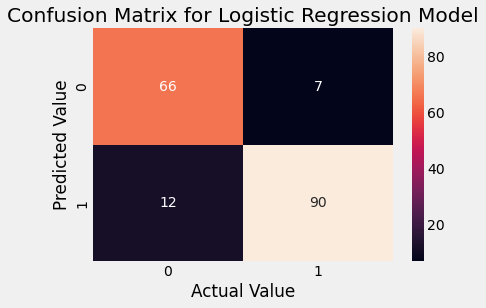

In [34]:
ConfusionMatrix = confusion_matrix(y_test, predictions)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

# K Nearest Neighbour

In [35]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [36]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
pred = knn.predict(X_test)

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        73
           1       0.89      0.85      0.87       102

    accuracy                           0.85       175
   macro avg       0.85      0.85      0.85       175
weighted avg       0.85      0.85      0.85       175



In [39]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

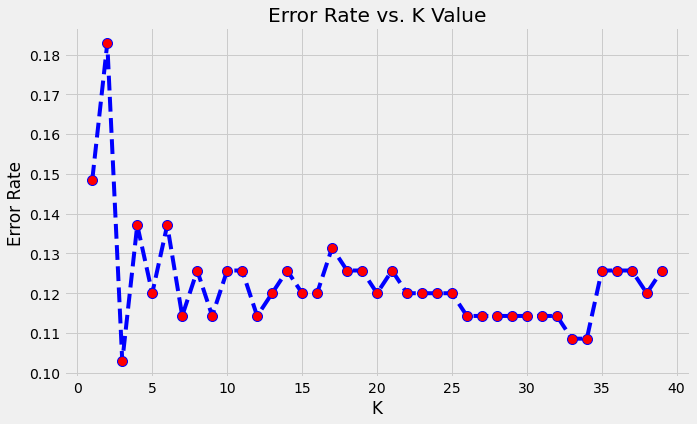

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [41]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[65  8]
 [13 89]]


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        73
           1       0.92      0.87      0.89       102

    accuracy                           0.88       175
   macro avg       0.88      0.88      0.88       175
weighted avg       0.88      0.88      0.88       175



[[66  7]
 [12 90]]


Text(0.5, -1.340000000000014, 'Actual Value')

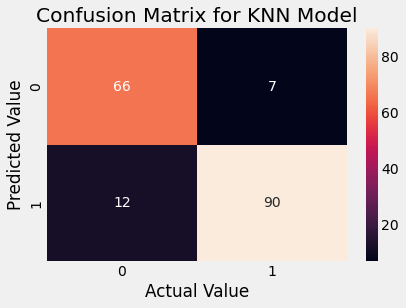

In [42]:
ConfusionMatrix = confusion_matrix(y_test, predictions)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True)
plt.title('Confusion Matrix for KNN Model')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

# Naive Bayes

In [43]:
gaussian = GaussianNB()

In [44]:
gaussian.fit(X_train,y_train)

GaussianNB()

In [45]:
predictions = gaussian.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        73
           1       0.91      0.85      0.88       102

    accuracy                           0.86       175
   macro avg       0.86      0.86      0.86       175
weighted avg       0.87      0.86      0.86       175



[[64  9]
 [15 87]]


Text(0.5, -1.340000000000014, 'Actual Value')

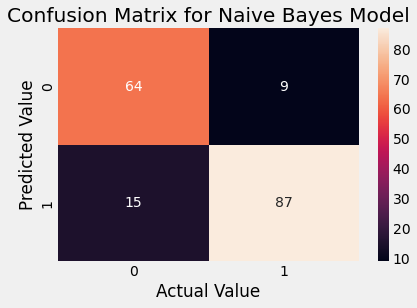

In [46]:
ConfusionMatrix = confusion_matrix(y_test, predictions)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True)
plt.title('Confusion Matrix for Naive Bayes Model')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

# Support Vector Machine

In [47]:
svm = SVC()

In [48]:
svm = svm.fit(X_train,y_train)

In [49]:
predictions = svm.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86        73
           1       0.92      0.87      0.89       102

    accuracy                           0.88       175
   macro avg       0.88      0.88      0.88       175
weighted avg       0.88      0.88      0.88       175



[[65  8]
 [13 89]]


Text(0.5, -1.340000000000014, 'Actual Value')

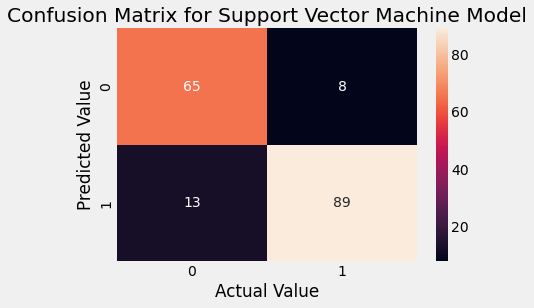

In [50]:
ConfusionMatrix = confusion_matrix(y_test, predictions)
print(ConfusionMatrix)
sns.heatmap(ConfusionMatrix, annot=True)
plt.title('Confusion Matrix for Support Vector Machine Model')
plt.ylabel('Predicted Value')
plt.xlabel('Actual Value')

In [51]:
#!pip install gradio

# Saving & Load best model

In [52]:
import pickle

In [53]:
filename = 'finalized_model.sav'
pickle.dump(logmodel, open(filename, 'wb'))

In [54]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8914285714285715


# GUI for prototype

In [55]:
import gradio as gr

In [56]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             874 non-null    float64
 1   Sex             874 non-null    int32  
 2   ChestPainType   874 non-null    int32  
 3   RestingBP       874 non-null    float64
 4   Cholesterol     874 non-null    float64
 5   FastingBS       874 non-null    int64  
 6   RestingECG      874 non-null    int32  
 7   MaxHR           874 non-null    float64
 8   ExerciseAngina  874 non-null    int32  
 9   Oldpeak         874 non-null    float64
 10  ST_Slope        874 non-null    int32  
 11  HeartDisease    874 non-null    int64  
dtypes: float64(5), int32(5), int64(2)
memory usage: 104.0 KB


In [57]:
#scaler = StandardScaler()
#Age = 49
#Sex = 'F'
#ChestPainType = 'NAP'
#RestingBP = 160
#Cholesterol = 180
#FastingBS = 0
#RestingECG = 'Normal'
#MaxHR = 156
#ExerciseAngina = 'N'
#Oldpeak = 1
#ST_Slope = 'Flat'
#data1 = {'Age' : [Age],'Sex' : [Sex],'ChestPainType' : [ChestPainType],
#        'RestingBP' : [RestingBP],'Cholesterol' : [Cholesterol],'FastingBS' : [FastingBS],
#       'FastingBS' : [FastingBS], 'RestingECG' : [RestingECG],'MaxHR': [MaxHR],'ExerciseAngina' : [ExerciseAngina],
#       'Oldpeak' : [Oldpeak], 'ST_Slope' : [ST_Slope]}

#df=pd.DataFrame(data1)
#df.head()
#le_x = LabelEncoder()
#df['Sex'] = le_x.fit_transform(df['Sex'])
#df['ChestPainType'] = le_x.fit_transform(df['ChestPainType'])
#df['RestingECG'] = le_x.fit_transform(df['RestingECG'])
#df['ExerciseAngina'] = le_x.fit_transform(df['ExerciseAngina'])

#print(df)
#df[['RestingBP']] = scaler.fit_transform(df[['RestingBP']])
#df[['Cholesterol']] = scaler.fit_transform(df[['Cholesterol']])
#df[['MaxHR']] = scaler.fit_transform(df[['MaxHR']])
#df = pd.get_dummies(df , columns=['Sex','ChestPainType','ST_Slope','RestingECG','ExerciseAngina'])


#data2 = {'Age' : [0], 'RestingBP' : [0],'Cholesterol' : [0],'FastingBS' : [0],
#       'FastingBS' : [0],'MaxHR': [0],
#       'Oldpeak' : [0],'Sex_0' : [0],'Sex_1' : [0],'ChestPainType_0' : [0],'ChestPainType_1' : [0],'ChestPainType_2' : [0],'ChestPainType_3' : [0],
##       'ST_Slope_0' : [0],'ST_Slope_1' : [0],'ST_Slope_2' : [0],'RestingECG_0' : [0],'RestingECG_1' : [0],'RestingECG_2' : [0],'ExerciseAngina_0' :[0],
#        'ExerciseAngina_1' : [0]}
#df2=pd.DataFrame(data2)
#df2 = df2.replace(df)


#preds = loaded_model.predict(df2)
#preds

In [58]:
def normalize(X,minimum,maximum):
    X_std = (X - minimum) / (maximum - minimum)
    return X_std


def make_prediction(Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope):
    with open("finalized_model.sav", "rb") as f:
        mdl  = pickle.load(f)
        
        if Sex == 'Female':
            Sex = 0
        else:
            Sex = 1
        
        if ChestPainType == 'ASY':
            ChestPainType = 0
        else:
            if ChestPainType == 'ATA':
                ChestPainType = 1
            else:
                if ChestPainType == 'NAP':
                    ChestPainType = 2
                else:
                    ChestPainType =3
            
        
        if RestingECG == 'Normal':
            RestingECG = 1
        else:
            if RestingECG =='ST':
                RestingECG = 2
            else:
                RestingECG = 0

        if ExerciseAngina == 'Yes':
            ExerciseAngina = 1
        else:
            ExerciseAngina = 0                   
        
        if ST_Slope == 'Up':
            ST_Slope = 2
        else:
            if ST_Slope == 'Flat':
                ST_Slope =1
            else:
                ST_Slope =0
                
        data = {'Age' : [Age],'Sex' : [Sex],'ChestPainType' : [ChestPainType],
        'RestingBP' : [RestingBP],'Cholesterol' : [Cholesterol],'FastingBS' : [FastingBS],
        'FastingBS' : [FastingBS], 'RestingECG' : [RestingECG],'MaxHR': [MaxHR],'ExerciseAngina' : [ExerciseAngina],
        'Oldpeak' : [Oldpeak], 'ST_Slope' : [ST_Slope]}
        
        df=pd.DataFrame(data)
        df['Age'] = normalize(Age,Age_min,Age_max)
        df['RestingBP'] = normalize(RestingBP,RestingBP_min,RestingBP_max)
        df['Cholesterol'] = normalize(Cholesterol,Cholesterol_min,Cholesterol_max)
        df['MaxHR'] = normalize(MaxHR,MaxHR_min,MaxHR_max)
        preds = mdl.predict_proba(df)[0]
        result = {'No Heart Disease': preds[0],'Has Heart Disease': preds[1]}
    return result    


Age_input = gr.Slider(minimum=1, maximum=100, label='Select Age')
Sex_input = gr.Radio(['Female','Male'] ,label='Sex')
ChestPainType_input = gr.Radio(['ASY', 'NAP', 'ATA', 'TA'], label='Select Chest Pain Type')
RestingBP_input = gr.Number(label='Input Resting Blood Pressure Value')
Cholesterol_input = gr.Number(label='Input Cholesterol levels (mg/dl)')
FastingBS_input = gr.Radio(['0','1'], label='Select Fasting Blood Sugar Value(0 = <120 mg/dl,1 = >120 mg/d)')
RestingECG_input = gr.Radio(['Normal','ST', 'LVH'], label='Select Resting Electrocardiographic results')
MaxHR_input = gr.Slider(minimum=50, maximum=200, label='Max Heart Rate of patient')
ExerciseAngina_input = gr.Radio(['No','Yes'], label='Induced Angina?')
Oldpeak_input = gr.Number(label='Insert Old Peak')
ST_Slope_input = gr.Radio(['Up','Flat','Down'], label='Select Peak exercise ST segment')  

#output = gr.Textbox()


app = gr.Interface(fn = make_prediction, inputs=[Age_input, Sex_input, ChestPainType_input, RestingBP_input,Cholesterol_input, FastingBS_input,RestingECG_input,MaxHR_input,ExerciseAngina_input,Oldpeak_input,ST_Slope_input], outputs="label")
app.launch()

Running on local URL:  http://127.0.0.1:7860/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x2197ee2a190>, 'http://127.0.0.1:7860/', None)

In [59]:
trial_data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
840   41   M           ATA        135          203          0     Normal   
202   42   M           NAP        160          147          0     Normal   
686   57   F           ASY        120          354          0     Normal   
240   55   M           ATA        145          326          0     Normal   
710   47   M           ASY        110          275          0        LVH   
..   ...  ..           ...        ...          ...        ...        ...   
873   64   M           NAP        140          335          0     Normal   
199   57   F            TA        130          308          0     Normal   
107   34   M           ATA        150          214          0         ST   
63    46   M           ASY        120          277          0     Normal   
859   51   F           NAP        140          308          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
840    132              N      0.0     Flat             0  
202    146              N      0.0       Up             0  
686    163              Y      0.6       Up             0  
240    155              N      0.0       Up             0  
710    118              Y      1.0     Flat             1  
..     ...            ...      ...      ...           ...  
873    158              N      0.0       Up             1  
199     98              N      1.0     Flat             0  
107    168              N      0.0       Up             0  
63     125              Y      1.0     Flat             1  
859    142              N      1.5       Up             0  

[874 rows x 12 columns]